In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

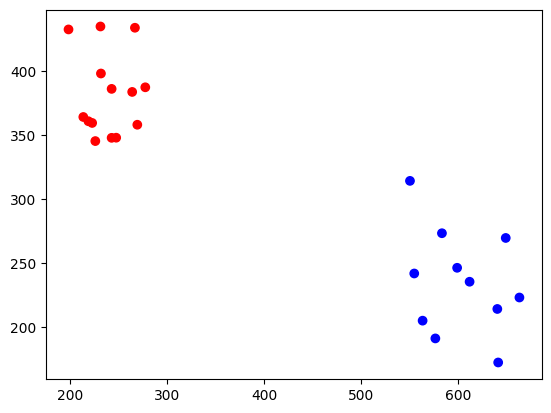

In [3]:
df=pd.read_csv("clusterpoints.csv")
x=df['x']
y=df['y']
color=['red' if c==0 else 'blue' for c in df['color']]
#print(color)
np_x=np.array(x)
np_y=np.array(y)
plt.scatter(x,y,c=color)
plt.show()

In [4]:
from math import sqrt
def euclidean_dist(p1,p2):
    x1,y1=p1
    x2,y2=p2
    return sqrt((x1-x2)**2+(y1-y2)**2)
print(euclidean_dist([0,0],[2,1]))

2.23606797749979


In [23]:
epsilon=50
minimum_points=3

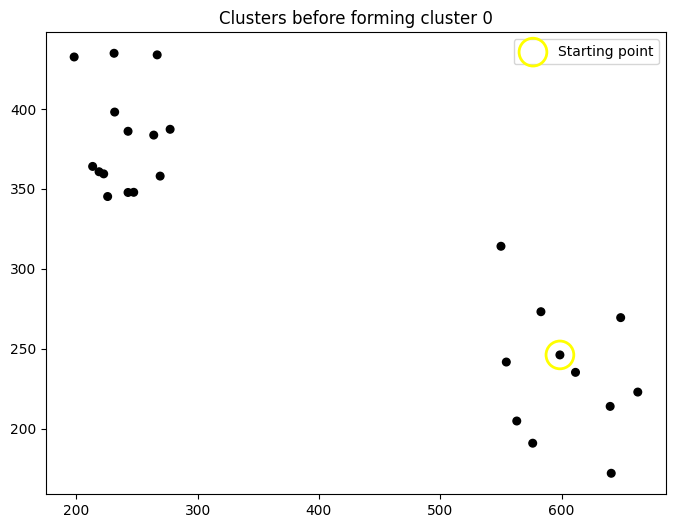

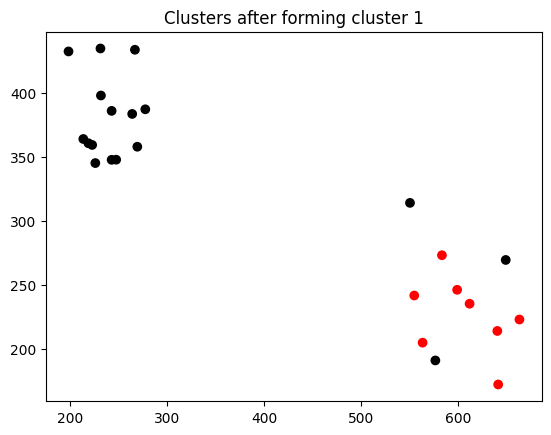

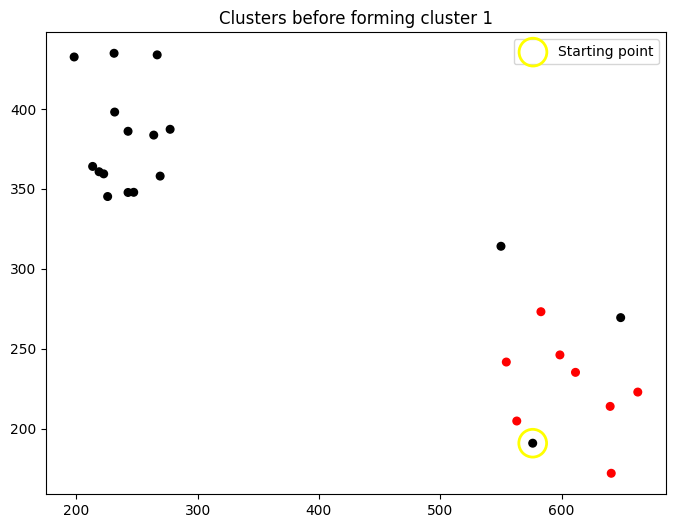

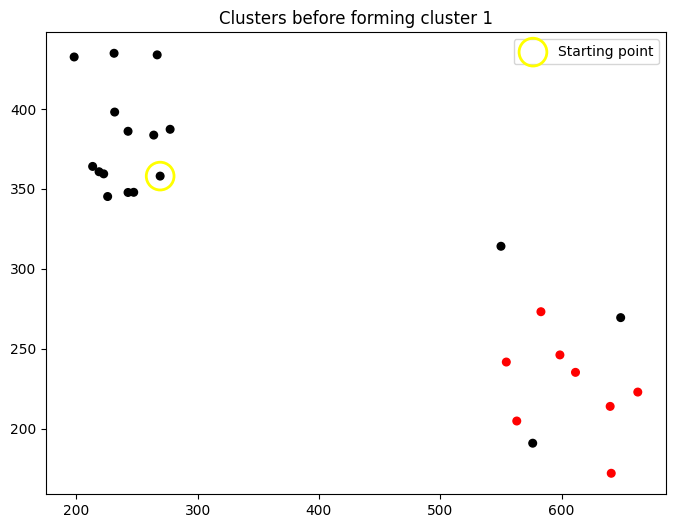

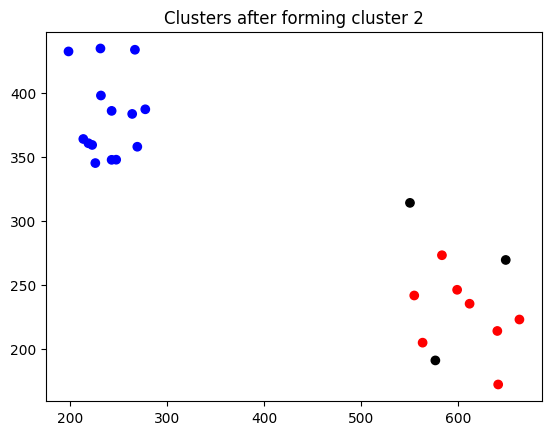

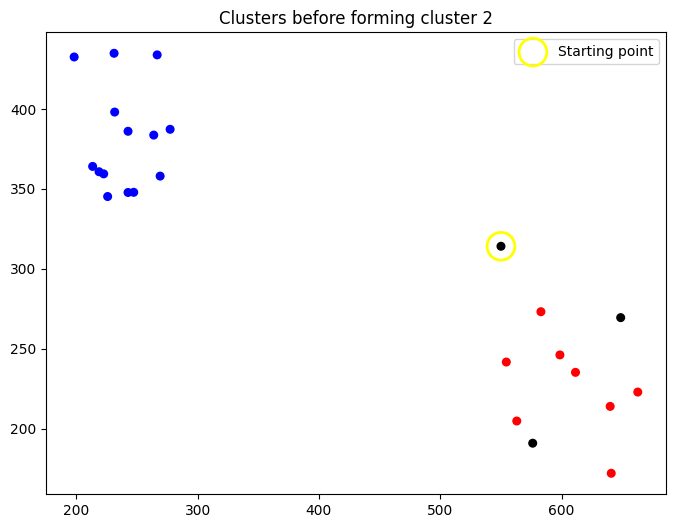

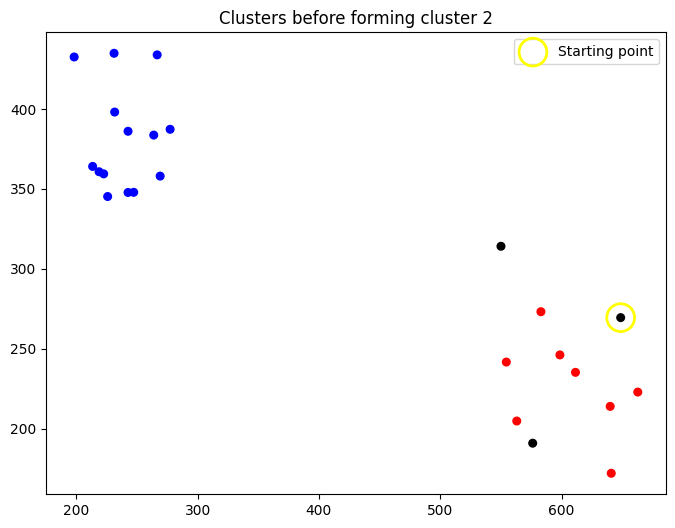

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1]


In [ ]:
from random import randint
length=len(df)
cluster_id=0
labels = [-1] * length 
unvisited_index=[i for i in range(length)]
colors=['red','blue','green','purple','orange','cyan','magenta','yellow','brown','pink']
point_colors=[]
for label in labels:
        point_colors.append('black')
while unvisited_index:
    random_point_index=randint(0,len(unvisited_index)-1)
    starting_point_index=unvisited_index[random_point_index]
    plt.figure(figsize=(8, 6))
    
    plt.scatter(df['x'], df['y'], s=30,c=point_colors)

    # Plot starting point (highlight in bigger size and different color)
    plt.scatter(df['x'][starting_point_index], df['y'][starting_point_index],
            facecolors='none', edgecolors='yellow', s=400, linewidths=2, label='Starting point')


    plt.title(f'Clusters before forming cluster {cluster_id}')
    plt.legend()
    plt.show()

    starting_point=df.iloc[starting_point_index]
    neighbors=[]
    coord=df.iloc[starting_point_index]
    for i in range(length):
        if(i==starting_point_index):
            continue
        
        distance=euclidean_dist([x[i],y[i]],[coord['x'],coord['y']])
        if(distance<=epsilon):
            neighbors.append(i)
    if(len(neighbors)<minimum_points):
        labels[starting_point_index]=-1
        #print(starting_point_index,'\n',unvisited_index)
        unvisited_index.remove(starting_point_index)
        continue
    cluster_id+=1    
    unvisited_index.remove(starting_point_index)
    queue = neighbors.copy()
    while(queue):
        neighbors_index=queue.pop(0)
        if neighbors_index in unvisited_index:
            unvisited_index.remove(neighbors_index)
            labels[neighbors_index]=cluster_id
            neighbor_point=df.iloc[neighbors_index]
            next_neighbor=[]
            coord=df.iloc[neighbors_index]
            for i in range(length):
                if(i==neighbors_index):
                    continue
                
                distance=euclidean_dist([x[i],y[i]],[coord['x'],coord['y']])
                if(distance<=epsilon):
                    next_neighbor.append(i)
            if(len(next_neighbor)>=minimum_points):
                    queue.extend(next_neighbor)
    labels[starting_point_index]=cluster_id
    point_colors=[]
    for label in labels:
        if label == -1:
            point_colors.append('black')
        else:
            point_colors.append(colors[(label-1)%len(colors)])
    plt.scatter(df['x'], df['y'], c=point_colors)
    plt.title(f'Clusters after forming cluster {cluster_id}')
    plt.show()
print(labels)




In [ ]:
#print(df['color'])
true_labels=[c-1 for c in df['color']]
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(true_labels, labels)
nmi = normalized_mutual_info_score(true_labels, labels)

print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Info: {nmi}")

Adjusted Rand Index: 0.8391995711988566
Normalized Mutual Info: 0.84179756185148


In [ ]:
#chatgpt code to save this visualization as a video
import numpy as np
import cv2
import matplotlib.pyplot as plt
from random import randint

length = len(df)
cluster_id = 0
labels = [-1] * length
unvisited_index = list(range(length))
colors_bgr = [(255, 0, 0), (0, 255, 0), (128, 0, 128), (0, 165, 255), (255, 255, 0),
              (255, 0, 255), (0, 255, 255), (42, 42, 165), (147, 20, 255)]

x = df['x'].tolist()
y = df['y'].tolist()

# Canvas & Video Settings
height, width = 480, 640
frame_rate = 3  # FPS
video_writer = cv2.VideoWriter('clustering_with_gray_circles.mp4',
                               cv2.VideoWriter_fourcc(*'mp4v'),
                               frame_rate, (width, height))

# Coordinate Mapping
x_min, x_max = min(x), max(x)
y_min, y_max = min(y), max(y)
x_range = x_max - x_min
y_range = y_max - y_min
avg_range = (x_range + y_range) / 2
pixels_per_unit = (width - 40) / avg_range
epsilon_pixels = max(2, int(epsilon * pixels_per_unit))

def normalize(val, old_min, old_max, new_min, new_max):
    return int((val - old_min) / (old_max - old_min) * (new_max - new_min) + new_min)

def to_canvas_coords(x_val, y_val):
    cx = normalize(x_val, x_min, x_max, 20, width - 20)
    cy = normalize(y_val, y_min, y_max, height - 20, 20)
    return cx, cy

def draw_frame(highlight_index=None):
    img = np.ones((height, width, 3), dtype=np.uint8) * 255
    for i in range(length):
        cx, cy = to_canvas_coords(x[i], y[i])
        if labels[i] == -1:
            cv2.circle(img, (cx, cy), 4, (0, 0, 0), -1)
        else:
            color = colors_bgr[(labels[i] - 1) % len(colors_bgr)]
            cv2.circle(img, (cx, cy), 4, color, -1)

    if highlight_index is not None:
        cx, cy = to_canvas_coords(x[highlight_index], y[highlight_index])
        cv2.circle(img, (cx, cy), epsilon_pixels, (150, 150, 150), 2)

    video_writer.write(img)

# Main clustering loop
while unvisited_index:
    random_point_index = randint(0, len(unvisited_index) - 1)
    starting_point_index = unvisited_index[random_point_index]

    draw_frame(highlight_index=starting_point_index)

    coord = df.iloc[starting_point_index]
    neighbors = []
    for i in range(length):
        if i == starting_point_index:
            continue
        distance = euclidean_dist([x[i], y[i]], [coord['x'], coord['y']])
        if distance <= epsilon:
            neighbors.append(i)

    if len(neighbors) < minimum_points:
        labels[starting_point_index] = -1
        unvisited_index.remove(starting_point_index)
        continue

    cluster_id += 1
    unvisited_index.remove(starting_point_index)
    labels[starting_point_index] = cluster_id
    queue = neighbors.copy()

    draw_frame(highlight_index=starting_point_index)

    while queue:
        neighbors_index = queue.pop(0)
        if neighbors_index in unvisited_index:
            unvisited_index.remove(neighbors_index)
            labels[neighbors_index] = cluster_id

            coord = df.iloc[neighbors_index]
            for i in range(length):
                if i == neighbors_index:
                    continue
                distance = euclidean_dist([x[i], y[i]], [coord['x'], coord['y']])
                if distance <= epsilon:
                    queue.append(i)

            draw_frame(highlight_index=neighbors_index)

# Final frame
draw_frame(highlight_index=None)
video_writer.release()
print("✅ Video saved as clustering_with_gray_circles.mp4")


✅ Video saved as clustering_with_gray_circles.mp4
